<a href="https://colab.research.google.com/github/AmamulHaq/Diamond_Price_Prediction/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
unm_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [14]:
unm_data.head()

,Index,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,42.000000,50.0,2.709000e+05,270944.0,NaN,17.0,50926.61588,NaN,76.00000,...,0.4706,1.00000,1.0,2.42650,0.9031,1.6435,0.81820,-0.29130,17330.74214,0
1,2,21447.088200,651.0,9.280951e+04,2538108.0,18692.78677,10.0,30.00000,11397.00000,13928.28300,...,0.6000,16312.01521,1.0,77065.88109,0.7782,1.4624,32878.73532,-0.17560,0.29840,0
2,3,829.000000,835.0,1.553913e+06,1553931.0,71.00000,8.0,19.00000,42364.01796,99.00000,...,0.7500,NaN,1.0,NaN,0.7782,1.2553,0.66670,57950.94468,0.21500,0
3,4,NaN,860.0,3.693700e+05,369415.0,176.00000,13.0,45.00000,52986.28857,99.00000,...,0.5385,1.00000,1.0,2.24550,0.8451,1.6532,0.84440,-0.15680,0.52120,0
4,5,8731.536644,NaN,4.980780e+05,NaN,2409.00000,60.0,260.00000,NaN,44878.63605,...,0.2833,0.98850,1.0,3.38180,1.2305,2.4099,0.93380,-0.19920,1.00000,0


In [15]:
housing = unm_data.copy()

In [16]:
corre_matrix = unm_data.corr()
corre_matrix['28'].sort_values(ascending=False)

28       1.000000
Index    0.948349
22       0.044532
27       0.036339
25       0.032849
19       0.032740
10       0.023925
20       0.020488
12       0.016113
3        0.009667
24       0.004977
14       0.004425
7        0.003931
23      -0.001814
26      -0.002115
13      -0.002203
9       -0.002764
17      -0.005495
16      -0.009199
21      -0.009534
15      -0.009997
6       -0.013110
1       -0.024828
4       -0.028613
2       -0.034558
5       -0.050128
11      -0.050334
18      -0.052026
8       -0.223209
Name: 28, dtype: float64

In [17]:
housing.describe()

,Index,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,1552.000000,1413.000000,1410.000000,1.434000e+03,1.427000e+03,1447.000000,1432.000000,1394.000000,1.431000e+03,1431.000000,...,1433.000000,1440.000000,1430.000000,1431.000000,1441.000000,1438.000000,1438.000000,1434.000000,1440.000000,1552.000000
mean,969.925258,10188.765558,11085.238336,1.384003e+06,1.359990e+06,11354.165540,10188.315292,9205.217162,1.880796e+05,10104.739273,...,11233.088211,9477.834199,7940.669845,9322.583671,9729.144100,10790.308649,9705.058886,9347.515854,10833.828520,3.840206
std,557.740141,23405.552077,24361.967007,1.742827e+06,1.766787e+06,23026.716180,23506.449429,22839.734152,5.209350e+05,23742.230521,...,25266.176805,23663.165226,20793.238425,22865.496768,23637.848792,24415.283947,23738.686819,22913.152773,24943.990077,2.140514
min,1.000000,0.000000,6.000000,6.065909e+02,1.477061e+02,2.000000,2.000000,1.000000,4.629513e+02,0.000000,...,0.064500,0.048400,0.000000,0.301000,0.301000,0.301000,-0.991000,-0.860300,0.119000,0.000000
25%,491.750000,108.000000,214.000000,1.333732e+05,9.952600e+04,104.500000,16.000000,16.000000,1.142350e+04,76.000000,...,0.500000,0.730800,0.000000,2.019100,1.041400,1.146100,-0.153900,-0.186100,0.299800,2.000000
50%,968.500000,770.000000,822.500000,8.510865e+05,8.386630e+05,275.000000,38.000000,35.000000,2.381700e+04,99.000000,...,0.718800,1.000000,1.000000,2.424900,1.301000,1.518500,0.300000,-0.103250,0.861200,5.000000
75%,1445.250000,1370.000000,1455.250000,1.977660e+06,1.970862e+06,7117.904824,578.657446,283.500000,7.369104e+04,121.000000,...,1.000000,1.000000,1.000000,3.833850,2.238000,2.235500,0.795350,0.009325,1.000000,6.000000
max,1941.000000,99704.673260,99392.220200,1.298766e+07,1.298769e+07,152655.000000,99779.704170,99179.080500,1.159141e+07,99497.950080,...,99882.823570,99989.506990,99588.942500,99917.171290,99821.243760,99904.969490,99419.873020,99914.902430,99520.229130,6.000000


In [18]:
housing.drop(columns=['Index','12','13','21','9','16','19'], inplace=True)

In [19]:
#housing.drop(columns=['Index','12','13','21'], inplace=True)

In [20]:
label = housing["28"].copy()

In [21]:
housing.drop(columns=['28'], inplace=True)

In [22]:
housing.describe()

,1,2,3,4,5,6,7,8,10,11,...,15,17,18,20,22,23,24,25,26,27
count,1413.000000,1410.000000,1.434000e+03,1.427000e+03,1447.000000,1432.000000,1394.000000,1.431000e+03,1435.000000,1427.000000,...,1433.000000,1425.000000,1410.000000,1440.000000,1431.000000,1441.000000,1438.000000,1438.000000,1434.000000,1440.000000
mean,10188.765558,11085.238336,1.384003e+06,1.359990e+06,11354.165540,10188.315292,9205.217162,1.880796e+05,9949.610713,11854.029300,...,9328.180802,9648.633648,9474.176219,9477.834199,9322.583671,9729.144100,10790.308649,9705.058886,9347.515854,10833.828520
std,23405.552077,24361.967007,1.742827e+06,1.766787e+06,23026.716180,23506.449429,22839.734152,5.209350e+05,23274.888182,24436.728985,...,23095.455921,23629.612989,23407.793891,23663.165226,22865.496768,23637.848792,24415.283947,23738.686819,22913.152773,24943.990077
min,0.000000,6.000000,6.065909e+02,1.477061e+02,2.000000,2.000000,1.000000,4.629513e+02,37.000000,823.877203,...,0.000000,0.009000,0.001500,0.048400,0.301000,0.301000,0.301000,-0.991000,-0.860300,0.119000
25%,108.000000,214.000000,1.333732e+05,9.952600e+04,104.500000,16.000000,16.000000,1.142350e+04,125.000000,1358.000000,...,0.075400,0.387300,0.007200,0.730800,2.019100,1.041400,1.146100,-0.153900,-0.186100,0.299800
50%,770.000000,822.500000,8.510865e+05,8.386630e+05,275.000000,38.000000,35.000000,2.381700e+04,133.000000,1398.000000,...,0.374300,0.695600,0.012500,1.000000,2.424900,1.301000,1.518500,0.300000,-0.103250,0.861200
75%,1370.000000,1455.250000,1.977660e+06,1.970862e+06,7117.904824,578.657446,283.500000,7.369104e+04,148.000000,1692.000000,...,0.861200,0.950000,0.124400,1.000000,3.833850,2.238000,2.235500,0.795350,0.009325,1.000000
max,99704.673260,99392.220200,1.298766e+07,1.298769e+07,152655.000000,99779.704170,99179.080500,1.159141e+07,99880.063960,99788.814580,...,99474.282950,99156.480400,99597.459890,99989.506990,99917.171290,99821.243760,99904.969490,99419.873020,99914.902430,99520.229130


In [23]:
def outlier(df, x):
   q1 = df[x].quantile(0.25)
   q3 = df[x].quantile(0.75)
   iqr = q3 - q1
   lower = q1 - 1.5*iqr
   upper = q3 + 1.5*iqr
    # Replace outliers with the mean value within the specified range
   mean_within_range = df[x][(df[x] >= lower) & (df[x] <= upper)].mean()

    # Replace outliers with the mean value within the specified range
   df.loc[(df[x] < lower) | (df[x] > upper), x] = mean_within_range

    # Return the modified DataFrame
   return df

In [24]:
i = 1
while i < 28:
   #if i == 12 or i == 13 or i == 21:
   if i == 12 or i == 13 or i == 21 or i == 9 or i == 16 or i == 19:
        i += 1  # Increment i to avoid infinite loop for these excluded columns
        continue
   housing = outlier(housing, str(i))  # Convert i to a string to pass as column name
   i += 1

In [25]:
housing.describe()

,1,2,3,4,5,6,7,8,10,11,...,15,17,18,20,22,23,24,25,26,27
count,1413.000000,1410.000000,1.434000e+03,1.427000e+03,1447.000000,1432.000000,1394.000000,1431.000000,1435.000000,1427.000000,...,1433.000000,1425.000000,1410.000000,1440.000000,1431.000000,1441.000000,1438.000000,1438.000000,1434.000000,1440.000000
mean,594.962141,641.305916,1.146914e+06,1.120970e+06,1888.957871,105.478551,73.785937,29100.963052,129.482511,1457.689707,...,0.331259,0.570168,0.029397,0.833430,2.487264,1.336357,1.411892,0.098589,-0.131673,0.591483
std,489.423046,452.078209,1.153222e+06,1.127137e+06,3323.190359,173.371467,102.996530,25090.988256,11.292374,128.751056,...,0.265370,0.243097,0.039298,0.192124,0.713273,0.437841,0.395286,0.441969,0.094254,0.300508
min,0.000000,6.000000,6.065909e+02,1.477061e+02,2.000000,2.000000,1.000000,462.951345,92.000000,1227.000000,...,0.000000,0.009000,0.001500,0.333300,0.301000,0.301000,0.301000,-0.991000,-0.469800,0.119000
25%,108.000000,214.000000,1.333732e+05,9.952600e+04,104.500000,16.000000,16.000000,11423.500000,125.000000,1358.000000,...,0.075400,0.387300,0.007200,0.794250,2.019100,1.041400,1.146100,-0.153900,-0.183375,0.299800
50%,594.962141,641.305916,8.510865e+05,8.386630e+05,275.000000,38.000000,35.000000,23817.000000,129.482511,1398.000000,...,0.331259,0.570168,0.012500,0.870500,2.424900,1.301000,1.411892,0.098589,-0.131673,0.591483
75%,947.000000,979.750000,1.759455e+06,1.751698e+06,1888.957871,105.478551,73.785937,32843.000000,134.000000,1457.689707,...,0.460200,0.777800,0.029397,1.000000,2.646400,1.397900,1.623300,0.428600,-0.091600,0.977600
max,3107.871364,3091.546846,4.737382e+06,4.737394e+06,17574.052630,1275.000000,684.000000,162939.000000,182.000000,1794.000000,...,0.995200,1.000000,0.297900,1.000000,4.572100,3.849011,2.618100,0.991700,0.296400,1.000000


In [26]:

#assign mean value for null data in column
for column in housing.columns:
    mean_value = housing[column].mean()  # Calculate mean for each column
    housing[column].fillna(value=mean_value, inplace=True)  # Replace NaNs with the mean value for each column



In [27]:
housing.describe()

,1,2,3,4,5,6,7,8,10,11,...,15,17,18,20,22,23,24,25,26,27
count,1552.000000,1552.000000,1.552000e+03,1.552000e+03,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,...,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,594.962141,641.305916,1.146914e+06,1.120970e+06,1888.957871,105.478551,73.785937,29100.963052,129.482511,1457.689707,...,0.331259,0.570168,0.029397,0.833430,2.487264,1.336357,1.411892,0.098589,-0.131673,0.591483
std,466.977403,430.886782,1.108486e+06,1.080763e+06,3208.732158,166.529640,97.609537,24092.390123,10.858103,123.453857,...,0.254987,0.232931,0.037456,0.185058,0.684886,0.421883,0.380482,0.425417,0.090597,0.289455
min,0.000000,6.000000,6.065909e+02,1.477061e+02,2.000000,2.000000,1.000000,462.951345,92.000000,1227.000000,...,0.000000,0.009000,0.001500,0.333300,0.301000,0.301000,0.301000,-0.991000,-0.469800,0.119000
25%,143.750000,218.000000,1.769455e+05,1.337020e+05,110.000000,17.000000,17.000000,11961.750000,126.000000,1358.000000,...,0.093725,0.400000,0.007400,0.826100,2.044325,1.041400,1.176100,-0.111100,-0.177225,0.316800
50%,594.962141,641.305916,9.713290e+05,1.011768e+06,370.500000,47.000000,52.500000,28492.778845,129.482511,1402.000000,...,0.331259,0.570168,0.015400,0.833430,2.487264,1.336357,1.411892,0.098589,-0.131673,0.591483
75%,857.250000,904.500000,1.653541e+06,1.647527e+06,1888.957871,105.478551,73.785937,30222.348732,134.000000,1457.689707,...,0.434775,0.750000,0.029397,1.000000,2.558700,1.361700,1.556300,0.385675,-0.097000,0.933025
max,3107.871364,3091.546846,4.737382e+06,4.737394e+06,17574.052630,1275.000000,684.000000,162939.000000,182.000000,1794.000000,...,0.995200,1.000000,0.297900,1.000000,4.572100,3.849011,2.618100,0.991700,0.296400,1.000000


In [28]:
#ax=sns.pairplot(housing, hue="8")

In [29]:
combine = pd.concat([label,housing], axis=1)

<ipython-input-30-37372cc8ebfa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='28',y='15',data=combine,palette='rainbow')


<Axes: xlabel='28', ylabel='15'>

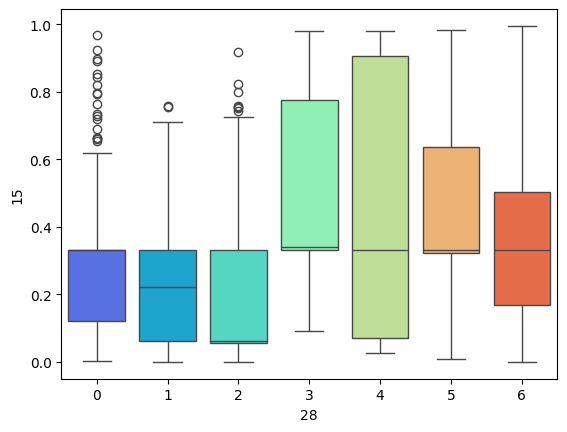

In [30]:
import seaborn as sns
sns.boxplot(x='28',y='15',data=combine,palette='rainbow')

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

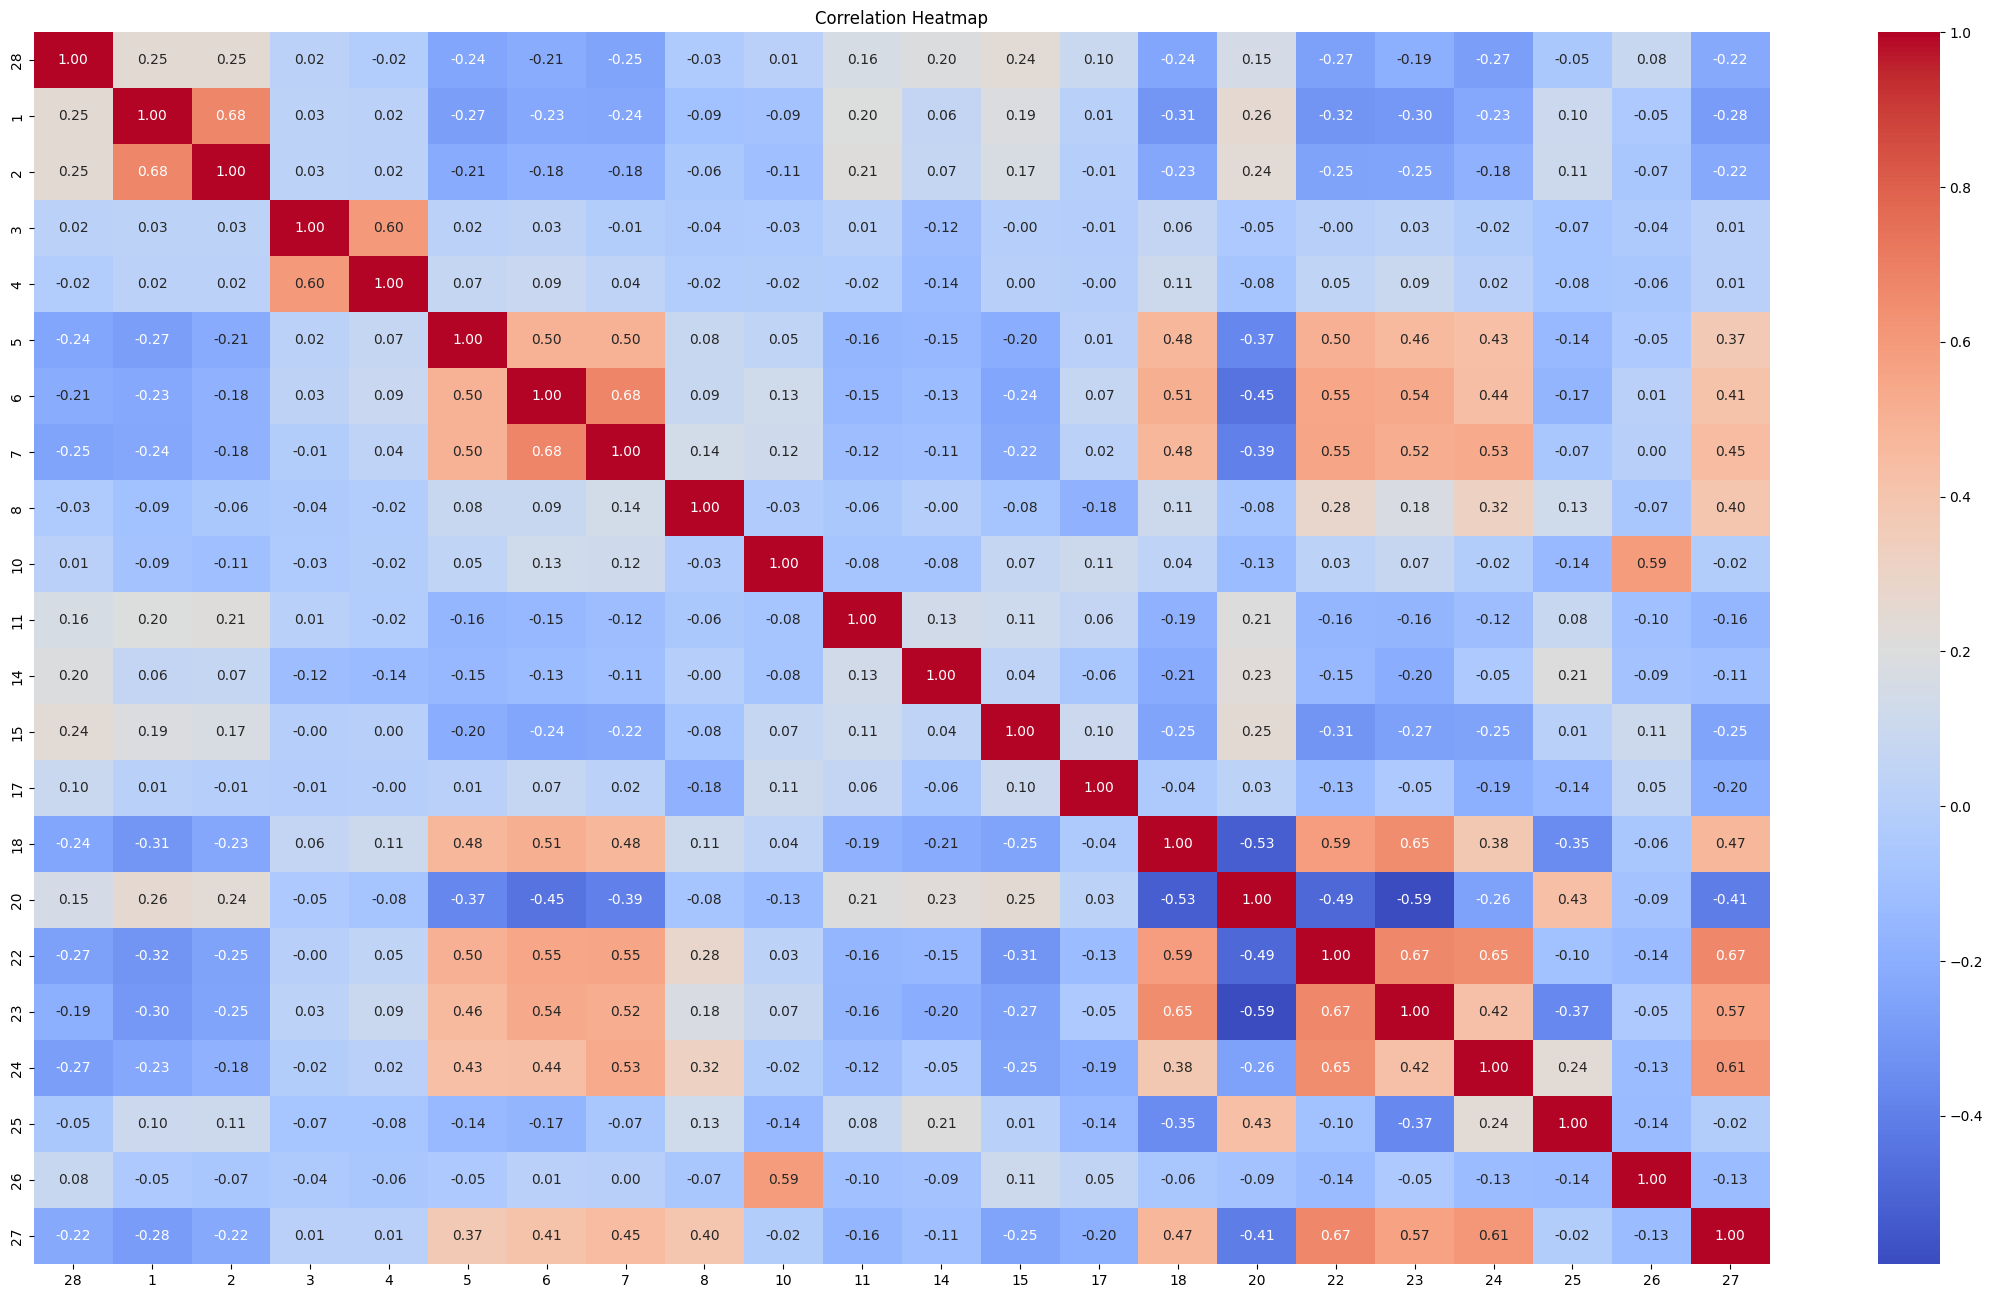

In [32]:
combines = combine.corr()
plt.figure(figsize=(28,16))
sns.heatmap(combines, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [33]:
corr_matrix = combine.corr()
corr_matrix['28'].sort_values(ascending=False)

28    1.000000
1     0.246589
2     0.245732
15    0.241243
14    0.196544
11    0.163391
20    0.149980
17    0.098047
26    0.081956
3     0.019596
10    0.013225
4    -0.021883
8    -0.034278
25   -0.052282
23   -0.187674
6    -0.208508
27   -0.220801
5    -0.239250
18   -0.241289
7    -0.245314
22   -0.267749
24   -0.270003
Name: 28, dtype: float64

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(combine,combine['28']):
    strat_train_set = combine.loc[train_index]
    strat_test_set = combine.loc[test_index]

In [35]:
strat_train_set.describe()

,28,1,2,3,4,5,6,7,8,10,...,15,17,18,20,22,23,24,25,26,27
count,1241.000000,1241.000000,1241.000000,1.241000e+03,1.241000e+03,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,...,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,3.842063,593.790063,635.037519,1.174473e+06,1.117761e+06,1926.756996,106.902603,74.312860,29184.575614,129.366599,...,0.325964,0.570566,0.028845,0.830919,2.493178,1.336400,1.415857,0.103512,-0.131680,0.595441
std,2.140064,475.193609,431.820075,1.116693e+06,1.075931e+06,3268.373351,167.970427,95.477606,23931.809624,10.823055,...,0.253765,0.232241,0.036112,0.187214,0.687153,0.415622,0.383359,0.420927,0.088363,0.287139
min,0.000000,0.000000,6.000000,9.520295e+02,1.477061e+02,2.000000,2.000000,1.000000,775.000000,92.000000,...,0.000000,0.039300,0.001500,0.333300,0.301000,0.301000,0.301000,-0.970600,-0.458800,0.119000
25%,2.000000,138.000000,218.000000,1.844550e+05,1.325760e+05,111.000000,17.000000,17.000000,12480.000000,126.000000,...,0.087200,0.400000,0.007400,0.812500,2.053100,1.041400,1.176100,-0.090900,-0.176500,0.332900
50%,5.000000,594.962141,641.305916,1.042404e+06,1.002587e+06,369.000000,47.000000,55.000000,28955.000000,129.482511,...,0.331259,0.570168,0.015300,0.833430,2.487264,1.336357,1.411892,0.098589,-0.131673,0.591483
75%,6.000000,871.000000,900.000000,1.692615e+06,1.626636e+06,1888.957871,105.478551,73.785937,30116.462940,134.000000,...,0.425400,0.750000,0.029397,1.000000,2.575200,1.361700,1.579800,0.381000,-0.097100,0.934900
max,6.000000,3107.871364,3091.546846,4.737382e+06,4.737394e+06,17574.052630,1275.000000,604.000000,162939.000000,182.000000,...,0.990500,1.000000,0.286800,1.000000,4.572100,3.074100,2.618100,0.991700,0.290500,1.000000


In [36]:
strat_train_set["28"].value_counts()

6    424
5    264
2    246
1    119
0    103
3     47
4     38
Name: 28, dtype: int64

In [37]:
y_train = strat_train_set['28'].copy()

In [38]:
strat_train_set.drop(columns=['28'], inplace=True)

In [39]:
x_train = strat_train_set.copy()

In [40]:
y_test = strat_test_set['28'].copy()

In [41]:
strat_test_set.drop(columns=['28'], inplace=True)

In [42]:
x_test = strat_test_set.copy()

In [43]:
x_test.describe()

,1,2,3,4,5,6,7,8,10,11,...,15,17,18,20,22,23,24,25,26,27
count,311.000000,311.000000,3.110000e+02,3.110000e+02,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,599.639147,666.319039,1.036945e+06,1.133775e+06,1738.125992,99.796081,71.683326,28767.319356,129.945043,1464.121578,...,0.352389,0.568581,0.031599,0.843450,2.463665,1.336184,1.396073,0.078945,-0.131641,0.575686
std,433.335446,426.915363,1.069805e+06,1.101499e+06,2958.956284,160.789592,105.827231,24759.301187,11.002262,128.449648,...,0.259142,0.236037,0.042391,0.176124,0.676342,0.446689,0.368956,0.443032,0.099166,0.298464
min,0.000000,12.000000,6.065909e+02,8.465816e+02,11.000000,3.000000,3.000000,462.951345,93.000000,1227.000000,...,0.000000,0.009000,0.002200,0.341600,0.778200,0.477100,0.301000,-0.991000,-0.469800,0.128400
25%,208.000000,264.500000,1.190815e+05,1.660800e+05,105.000000,17.000000,16.500000,10355.500000,126.000000,1358.000000,...,0.122650,0.400000,0.007400,0.833430,2.012800,1.041400,1.146100,-0.166700,-0.181250,0.290100
50%,594.962141,641.305916,7.988780e+05,1.038891e+06,375.000000,44.000000,37.000000,27785.000000,129.482511,1457.689707,...,0.331259,0.570168,0.016100,0.833430,2.487264,1.336357,1.411892,0.098589,-0.131673,0.591483
75%,836.500000,928.000000,1.489946e+06,1.684398e+06,1888.957871,105.478551,73.785937,30886.898290,134.000000,1457.689707,...,0.476050,0.731300,0.029397,1.000000,2.487264,1.361700,1.518500,0.395650,-0.095050,0.929200
max,1687.000000,1694.000000,4.726828e+06,4.726836e+06,16714.039370,1084.000000,684.000000,154035.000000,182.000000,1712.000000,...,0.995200,1.000000,0.297900,1.000000,4.386800,3.849011,2.369200,0.923100,0.296400,1.000000


In [44]:
#from xgboost import XGBClassifier


In [45]:
#model = XGBClassifier(
    #learning_rate=1,
    #n_estimators=500,
    #max_depth=4,
   # objective='multi:softmax',
    #num_class= 7
#)


In [46]:
#model.fit(x_train,y_train)


In [47]:
#y_pred = model.predict(x_test)
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(y_test, y_pred)


In [48]:
#print(y_pred)

In [49]:
#print(y_test)

In [50]:
#print(accuracy)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [52]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [53]:
y_pred = rf_classifier.predict(x_test)


In [54]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7009646302250804
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.27      0.37        26
           1       0.94      0.57      0.71        30
           2       0.95      0.90      0.93        62
           3       0.92      1.00      0.96        12
           4       0.57      0.44      0.50         9
           5       0.63      0.62      0.63        66
           6       0.59      0.76      0.67       106

    accuracy                           0.70       311
   macro avg       0.74      0.65      0.68       311
weighted avg       0.72      0.70      0.70       311

Confusion Matrix:
[[ 7  0  0  0  1  4 14]
 [ 0 17  0  0  0  0 13]
 [ 0  0 56  0  0  2  4]
 [ 0  0  0 12  0  0  0]
 [ 2  0  0  0  4  1  2]
 [ 1  1  0  0  0 41 23]
 [ 2  0  3  1  2 17 81]]
